In [1]:
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf 

In [2]:
from sklearn.datasets import make_moons
X , y = make_moons(n_samples = 100 , noise = 0.25 , random_state = 42)

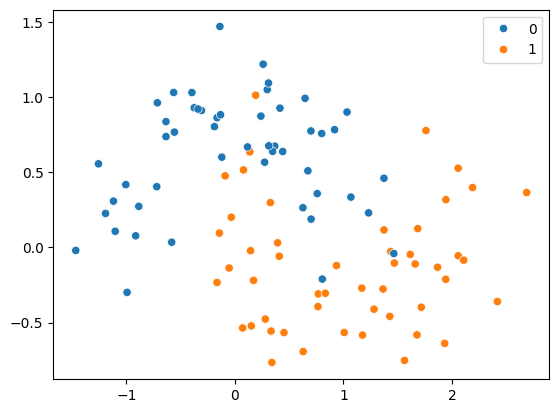

In [3]:
plt.figure()
sns.scatterplot(x = X[ : , 0] , y = X[ : , 1] , hue = y)
plt.legend()
plt.show()

In [4]:
X.shape

(100, 2)

## Initialization with wieght 0

In [7]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32 , activation = 'relu' , kernel_initializer = tf.keras.initializers.Zeros() , input_shape = (X.shape[1] , )), 
    tf.keras.layers.Dense(32 , activation = 'relu' , kernel_initializer = tf.keras.initializers.Zeros()), 
    tf.keras.layers.Dense(2 , activation = 'softmax' , kernel_initializer = tf.keras.initializers.Zeros())
])
model1.summary()

C:\Users\tipto\anaconda3\envs\DL311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,218 (4.76 KB)

 Trainable params: 1,218 (4.76 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model1.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [9]:
history = model1.fit(X , y , epochs = 100 , verbose = 1 , validation_split = 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.5250 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6935
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5250 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6938
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5250 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6939
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5250 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6941
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5250 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6942
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5250 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6944
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5250 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6945
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5250 - loss: 0.6928 - val_accuracy: 0.4000 - val_loss

### We can see that model never got trained cause loss and accuracy remain same always

In [11]:
class KerasClassifierWrapper: # cause softmax returns prob not actual class 
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        probs = self.model.predict(X)
        return np.argmax(probs, axis=1)

# wrap your model
wrapped_model = KerasClassifierWrapper(model1)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


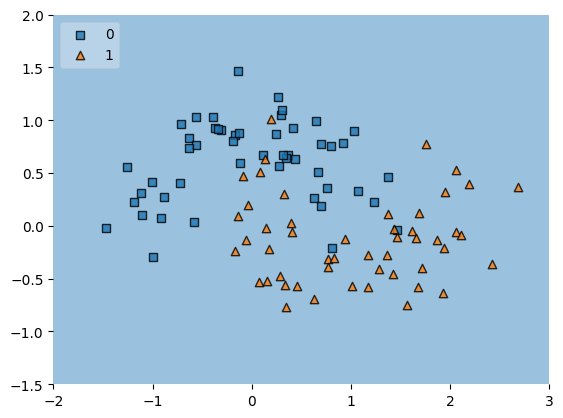

In [12]:
plot_decision_regions(X , y.astype('int') , clf = wrapped_model , legend = 2)
plt.xlim(-2 , 3)
plt.ylim(-1.5 , 2)
plt.show()

# He initialization

In [13]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32 , activation = 'relu' , kernel_initializer = tf.keras.initializers.HeNormal() , input_shape = (X.shape[1] , )), 
    tf.keras.layers.Dense(32 , activation = 'relu' , kernel_initializer = tf.keras.initializers.HeNormal()), 
    tf.keras.layers.Dense(2 , activation = 'softmax' , kernel_initializer = tf.keras.initializers.HeNormal())
])

C:\Users\tipto\anaconda3\envs\DL311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model1.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [16]:
history1 = model1.fit(X , y , epochs = 100 , verbose = 1 , validation_split = 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9125 - loss: 0.2381 - val_accuracy: 0.8000 - val_loss: 0.3623
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9125 - loss: 0.2382 - val_accuracy: 0.8000 - val_loss: 0.3605
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9125 - loss: 0.2377 - val_accuracy: 0.8000 - val_loss: 0.3617
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9125 - loss: 0.2369 - val_accuracy: 0.8000 - val_loss: 0.3615
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9125 - loss: 0.2369 - val_accuracy: 0.8000 - val_loss: 0.3608
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9125 - loss: 0.2362 - val_accuracy: 0.8000 - val_loss: 0.3628
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9125 - loss: 0.2358 - val_accuracy: 0.8000 - val_loss: 0.3648
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9000 - loss: 0.2358 - val_accuracy: 0.8000 - val_loss:

In [17]:
# wrap your model
wrapped_model = KerasClassifierWrapper(model1)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


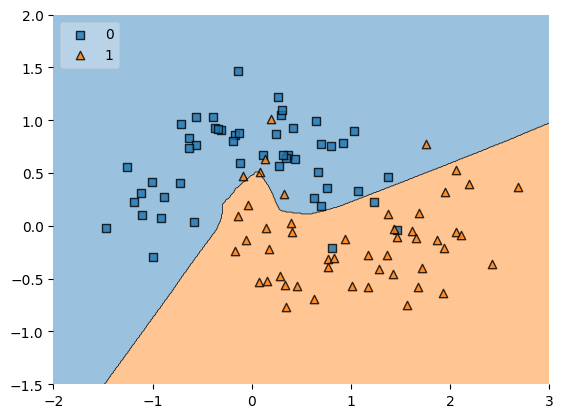

In [18]:
plot_decision_regions(X , y.astype('int') , clf = wrapped_model , legend = 2)
plt.xlim(-2 , 3)
plt.ylim(-1.5 , 2)
plt.show()